Figures for Section 1.3

In [2]:
# libraries
knitr::opts_chunk$set(warning = FALSE, message = FALSE)
library(stringr)
library(dplyr)
library(tidyr)

Figure 1.7

Annual water levels of Lake Huron (left panel) and the residual plot obtained from fitting a
linear trend to the data (right panel).

In [3]:
# data folder path to be used to concatenate strings
datapath = "../../data/"

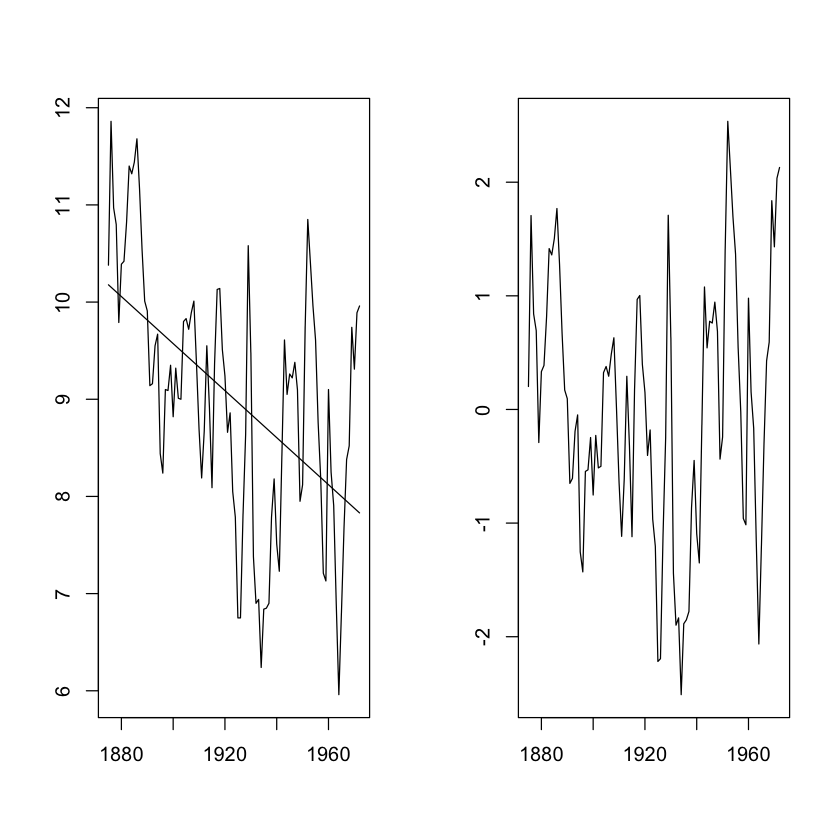

In [4]:
lake = read.table(str_c(datapath, "lake.dat"))
lake.ts = ts(lake, start=1875)
t = 1:length(lake.ts)
lsfit = lm(lake.ts ~ t)

par(mfrow=c(1,2))
plot(lake.ts, xlab = "", ylab = "", main = "")
# shift the fitting line by x-axis
lines(t + 1874, lsfit$fit)
plot(lake.ts-lsfit$fit, xlab="", ylab="", main="")

Figure 1.8

The two-sided moving average filters Wt for the Lake Huron data (upper panel) and their
residuals (lower panel) with bandwidth q = 2 (left), q = 10 (middle) and q = 35 (right).

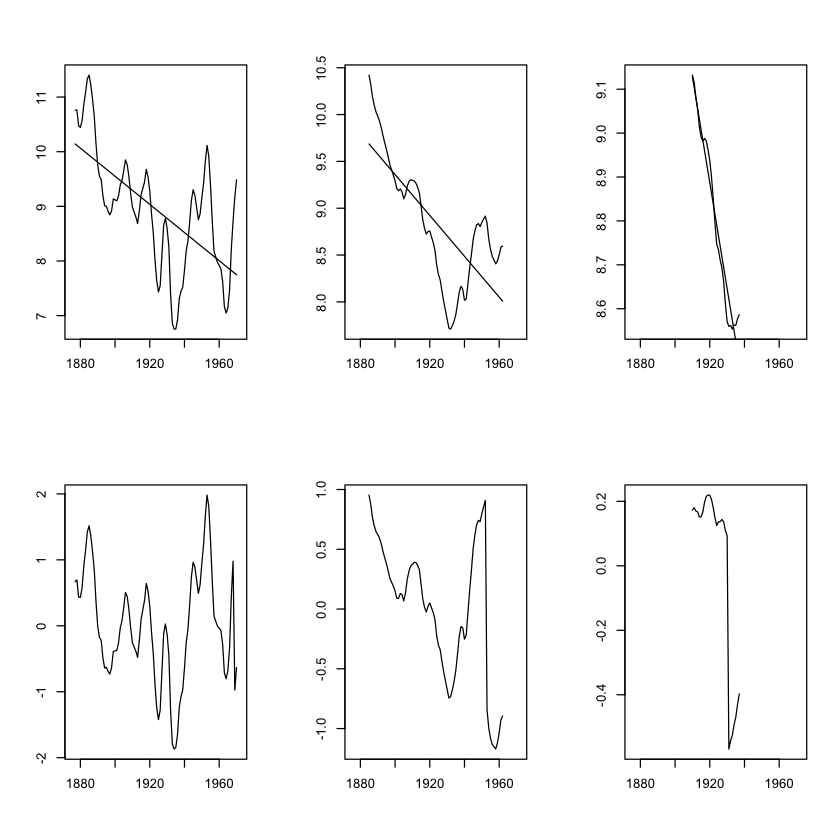

In [6]:
ma2 <- stats::filter(lake, filter = rep(1/5, 5), sides = 2)
ma10 <- stats::filter(lake, filter = rep(1/21, 21), sides = 2)
ma35 <- stats::filter(lake, filter = rep(1/71, 71), sides = 2)

# remove warnings globally
suppressWarnings({
par(mfrow=c(2,3))
ls_ma2 = lm(ma2 ~ t)
range_fit2 = c((1875+2):(1972-2))
plot(t+1874, ma2, xlab="", ylab="",type="l")
lines(range_fit2, ls_ma2$fit)

ls_ma10 = lm(ma10 ~ t)
range_fit10 = c((1875+10):(1972-10))
plot(t+1874, ma10, xlab="", ylab="",type="l")
lines(range_fit10, ls_ma10$fit)

ls_ma35 = lm(ma35 ~ t)
range_fit35 = c((1875+35):(1972-35))
plot(t+1874, ma35, xlab="", ylab="",type="l")
lines(range_fit35, ls_ma35$fit)

plot(t+1874, ma2-ls_ma2$fit, xlab="", ylab="", main="", type="l")
plot(t+1874, ma10-ls_ma10$fit, xlab="", ylab="", main="", type="l")
plot(t+1874, ma35-ls_ma35$fit, xlab="", ylab="", main="", type="l")
})


Figure 1.9

Time series plots of the observed sequences ($\nabla x_t$) in the left panel and ($\nabla^2 x_t$) in the right
panel of the differenced Lake Huron data described in Example 1.3.1.

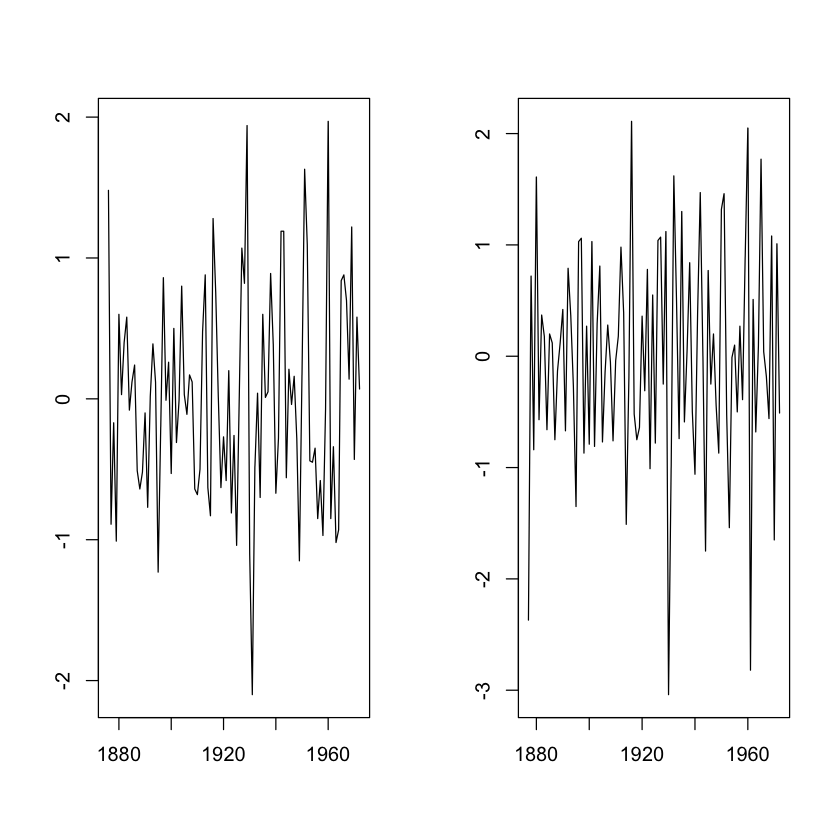

In [65]:
d1 = diff(lake$V1)
x1=1876:1972
d2 = diff(d1)
x2 = 1877:1972
par(mfrow=c(1,2))
plot(x=x1, y=d1, xlab="", ylab="", type="l")
plot(x=x2, y=d2, xlab="", ylab="", type="l")

References: 
1. https://rpubs.com/clayford/955067